In [1]:
from qdlutils.applications.qdlscan.application_controller import ScanController
from qdlutils.hardware.nidaq.counters.nidaqtimedratecounter import NidaqTimedRateCounter
from qdlutils.hardware.nidaq.analogoutputs.nidaqposition import NidaqPositionController
import matplotlib.pyplot as plt

In [2]:
rate_counter = NidaqTimedRateCounter(
                    daq_name = 'Dev1',
                    signal_terminal = 'PFI0',
                    clock_rate = 100000,
                    sample_time_in_seconds = 1,
                    clock_terminal = None,
                    read_write_timeout = 10,
                    signal_counter = 'ctr2',
                    trigger_terminal = None)

x_control = NidaqPositionController( 
                    device_name = 'Dev1',
                    write_channel= 'ao0',
                    read_channel = None,
                    move_settle_time = 0.0,
                    scale_microns_per_volt = 8,
                    zero_microns_volt_offset = 5,
                    min_position = -40.0,
                    max_position = 40.0,
                    invert_axis = False)

y_control = NidaqPositionController( 
                    device_name = 'Dev1',
                    write_channel= 'ao1',
                    read_channel = None,
                    move_settle_time = 0.0,
                    scale_microns_per_volt = 8,
                    zero_microns_volt_offset = 5,
                    min_position = -40.0,
                    max_position = 40.0,
                    invert_axis = False)

z_control = NidaqPositionController( 
                    device_name = 'Dev1',
                    write_channel= 'ao2',
                    read_channel = None,
                    move_settle_time = 0.0,
                    scale_microns_per_volt = 8,
                    zero_microns_volt_offset = 5,
                    min_position = -40.0,
                    max_position = 40.0,
                    invert_axis = False)

In [3]:
scan_controller = ScanController(
                    x_axis_controller = x_control,
                    y_axis_controller = y_control,
                    z_axis_controller = z_control,
                    counter_controller = rate_counter)

In [4]:
scan_controller.set_axis(axis='z', position=0)

INFO:qdlutils.applications.qdlscan.application_controller:Starting counter task on DAQ.
INFO:qdlutils.applications.qdlscan.application_controller:Stopping counter task on DAQ.


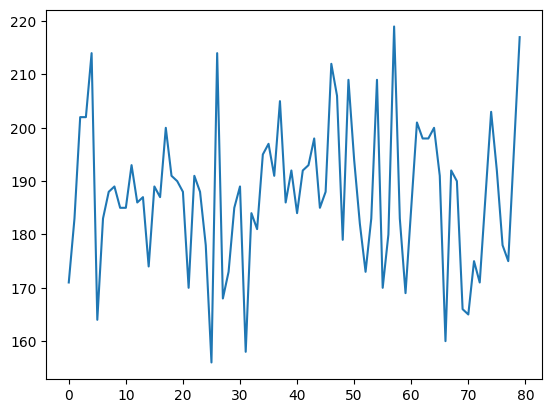

In [5]:
data = scan_controller.scan_axis(
                  axis = 'x',
                  start = -40,
                  stop = 40,
                  n_pixels = 80,
                  scan_time = 5)
plt.plot(data)

INFO:qdlutils.applications.qdlscan.application_controller:Starting counter task on DAQ.


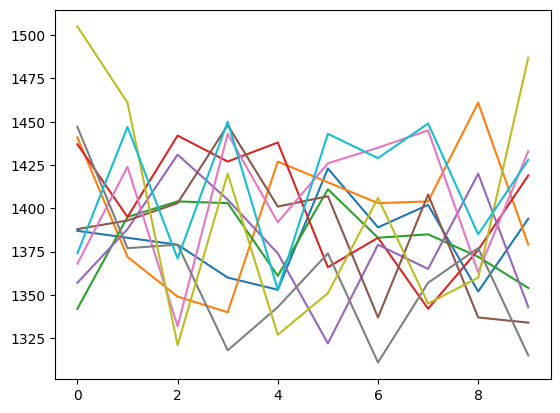

In [5]:
for line in scan_controller.scan_image(
                   axis_1='x',
                   start_1=-40,
                   stop_1=40,
                   n_pixels_1=10,
                   axis_2='y',
                   start_2=-40,
                   stop_2=40,
                   n_pixels_2=10,
                   scan_time=5):
    plt.plot(line)

In [9]:
scan_controller.stop_scan

False

In [6]:
from threading import Thread
import time

In [7]:
def scan_thread_function() -> None:

        for line in scan_controller.scan_image(
                   axis_1='x',
                   start_1=-40,
                   stop_1=40,
                   n_pixels_1=5,
                   axis_2='y',
                   start_2=-40,
                   stop_2=40,
                   n_pixels_2=5,
                   scan_time=5):
                
            data.append(line)

INFO:qdlutils.applications.qdlscan.application_controller:Starting counter task on DAQ.


[array([2919., 2838., 2775., 2853., 2747.])]


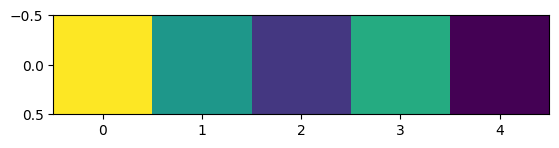

[array([2919., 2838., 2775., 2853., 2747.]), array([2882., 2795., 2805., 2774., 2791.])]


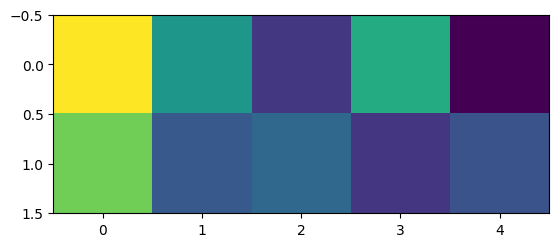

[array([2919., 2838., 2775., 2853., 2747.]), array([2882., 2795., 2805., 2774., 2791.]), array([2750., 2824., 2741., 2757., 2759.])]


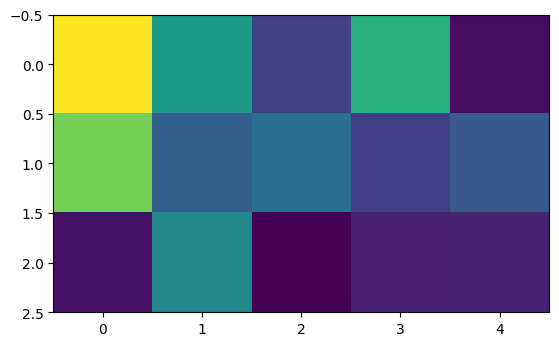

[array([2919., 2838., 2775., 2853., 2747.]), array([2882., 2795., 2805., 2774., 2791.]), array([2750., 2824., 2741., 2757., 2759.]), array([2872., 2818., 2894., 2760., 2689.])]


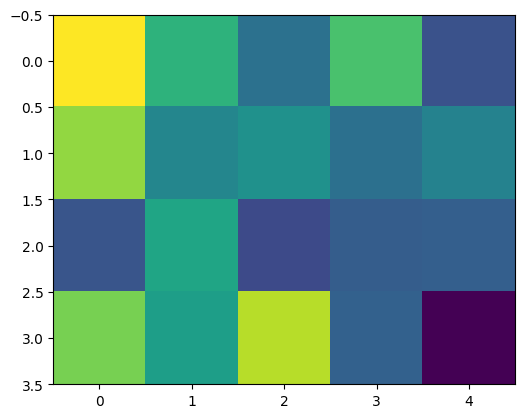

[array([2919., 2838., 2775., 2853., 2747.]), array([2882., 2795., 2805., 2774., 2791.]), array([2750., 2824., 2741., 2757., 2759.]), array([2872., 2818., 2894., 2760., 2689.]), array([2779., 2796., 2828., 2796., 2724.])]


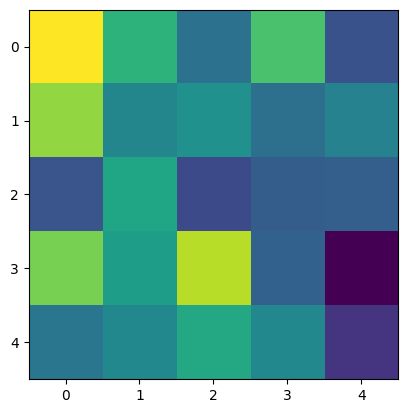

In [10]:
data = []
scan_thread = Thread(target=scan_thread_function)
scan_thread.start()
current_length = 0
while len(data) < 5:
    if current_length != len(data):
        print(data)
        plt.imshow(data)
        plt.show()
        current_length = len(data)